In [77]:
!wget https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz

--2022-04-30 09:08:59--  https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 300971569 (287M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop3.2.tgz.1’

spark-3.2.1-bin-had 100%[===================>] 287.03M   227MB/s    in 1.3s    

2022-04-30 09:09:00 (227 MB/s) - ‘spark-3.2.1-bin-hadoop3.2.tgz.1’ saved [300971569/300971569]



In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
!tar -xvzf spark-3.2.1-bin-hadoop3.2.tgz

spark-3.2.1-bin-hadoop3.2/
spark-3.2.1-bin-hadoop3.2/LICENSE
spark-3.2.1-bin-hadoop3.2/NOTICE
spark-3.2.1-bin-hadoop3.2/R/
spark-3.2.1-bin-hadoop3.2/R/lib/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/DESCRIPTION
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/INDEX
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/Rd.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/features.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/hsearch.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/links.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/nsInfo.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/package.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/vignette.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/NAMESPACE
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/SparkR
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/SparkR.rdb
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/SparkR.rdx
spark-3.2.1-bin-hadoop3.2/R/lib/Sp

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
!wget https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz

--2022-04-30 09:09:08--  https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 300971569 (287M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop3.2.tgz.2’

spark-3.2.1-bin-had 100%[===================>] 287.03M   228MB/s    in 1.3s    

2022-04-30 09:09:09 (228 MB/s) - ‘spark-3.2.1-bin-hadoop3.2.tgz.2’ saved [300971569/300971569]



In [82]:
# configure 
!pip install findspark

In [83]:
import os
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [84]:
import findspark
findspark.init()

In [85]:
!pip install  pyspark[sql]

In [86]:
from pyspark.sql  import SparkSession
import pyspark.sql.functions as F
import pyspark.sql.types as T
spark = SparkSession.builder.getOrCreate()
df = spark.read.csv("Tweets1.csv", header=True, inferSchema=True)

In [87]:
df1=pd.read_csv('/content/Tweets1.csv')

In [88]:
df.show(20)

+--------+-----------------+----------------------------+--------------+-------------------------+--------------+----------------------+---------------+-------------------+-------------+--------------------+-----------+----------------+--------------------+--------------------+
|tweet_id|airline_sentiment|airline_sentiment_confidence|negativereason|negativereason_confidence|       airline|airline_sentiment_gold|           name|negativereason_gold|retweet_count|                text|tweet_coord|   tweet_created|      tweet_location|       user_timezone|
+--------+-----------------+----------------------------+--------------+-------------------------+--------------+----------------------+---------------+-------------------+-------------+--------------------+-----------+----------------+--------------------+--------------------+
|  5.7E17|          neutral|                         1.0|          null|                     null|Virgin America|                  null|        cairdin|           

### Listing the Viz
1. Count of Each Sentiment - Bar Graph
2. Ditribution of each sentiment Confidence - Histogram
3. Number of Tweets per airline - Barplot

In [89]:
df.registerTempTable("tweet")

/content/spark-3.2.1-bin-hadoop3.2/python/pyspark/sql/dataframe.py:140: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  FutureWarning


In [90]:
df.show()

+--------+-----------------+----------------------------+--------------+-------------------------+--------------+----------------------+---------------+-------------------+-------------+--------------------+-----------+----------------+--------------------+--------------------+
|tweet_id|airline_sentiment|airline_sentiment_confidence|negativereason|negativereason_confidence|       airline|airline_sentiment_gold|           name|negativereason_gold|retweet_count|                text|tweet_coord|   tweet_created|      tweet_location|       user_timezone|
+--------+-----------------+----------------------------+--------------+-------------------------+--------------+----------------------+---------------+-------------------+-------------+--------------------+-----------+----------------+--------------------+--------------------+
|  5.7E17|          neutral|                         1.0|          null|                     null|Virgin America|                  null|        cairdin|           

In [91]:
q1=spark.sql('''
FROM tweet select
airline_sentiment, count(airline_sentiment)
GROUP BY airline_sentiment
''')
qp1=q1.toPandas()
q1.show()

+-----------------+------------------------+
|airline_sentiment|count(airline_sentiment)|
+-----------------+------------------------+
|         positive|                    2363|
|          neutral|                    3099|
|         negative|                    9178|
+-----------------+------------------------+



Text(0, 0.5, 'Sequential')

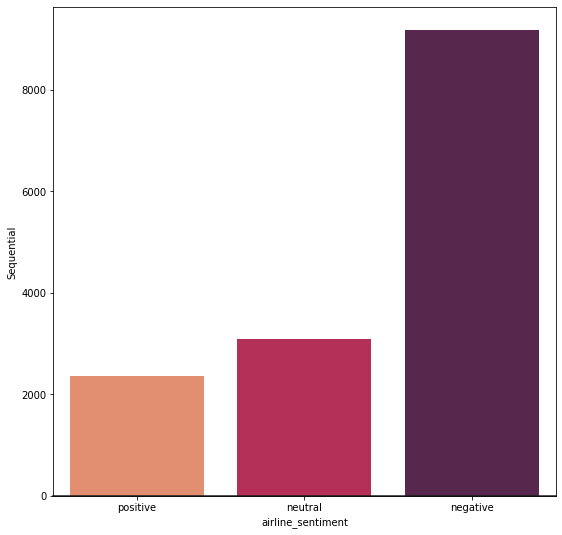

In [92]:
f, (ax1) = plt.subplots(1, 1, figsize=(9, 9), sharex=True)
sns.barplot(x=qp1['airline_sentiment'], y=qp1['count(airline_sentiment)'], palette="rocket_r", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

In [93]:
# Distribution of each sentiment Confidence
q2=spark.sql('''
FROM tweet select airline_sentiment, airline_sentiment_confidence
where airline_sentiment='positive'
''')
q3=spark.sql('''
FROM tweet select airline_sentiment, airline_sentiment_confidence
where airline_sentiment='negative'
''')
q4=spark.sql('''
FROM tweet select airline_sentiment, airline_sentiment_confidence
where airline_sentiment='neutral'
''')
qp=q2.toPandas()
qn=q3.toPandas()
qne=q4.toPandas()
q2.show()

+-----------------+----------------------------+
|airline_sentiment|airline_sentiment_confidence|
+-----------------+----------------------------+
|         positive|                      0.3486|
|         positive|                      0.6745|
|         positive|                      0.6559|
|         positive|                         1.0|
|         positive|                         1.0|
|         positive|                         1.0|
|         positive|                      0.6451|
|         positive|                         1.0|
|         positive|                         1.0|
|         positive|                         1.0|
|         positive|                         1.0|
|         positive|                         1.0|
|         positive|                         1.0|
|         positive|                         1.0|
|         positive|                         1.0|
|         positive|                         1.0|
|         positive|                      0.6639|
|         positive| 

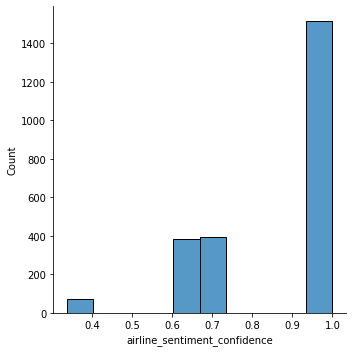

In [94]:
# f, (ax1) = plt.subplots(1, 1, figsize=(12, 10), sharex=True)
sns.displot(qp['airline_sentiment_confidence'], bins=10,palette="rocket_r")

In [95]:
q5=spark.sql('''
FROM tweet select airline,count(tweet_id)
GROUP BY airline
''')
q5.show()
q5p=q5.toPandas()

+--------------+---------------+
|       airline|count(tweet_id)|
+--------------+---------------+
|         Delta|           2222|
|Virgin America|            504|
|        United|           3822|
|    US Airways|           2913|
|     Southwest|           2420|
|      American|           2759|
+--------------+---------------+



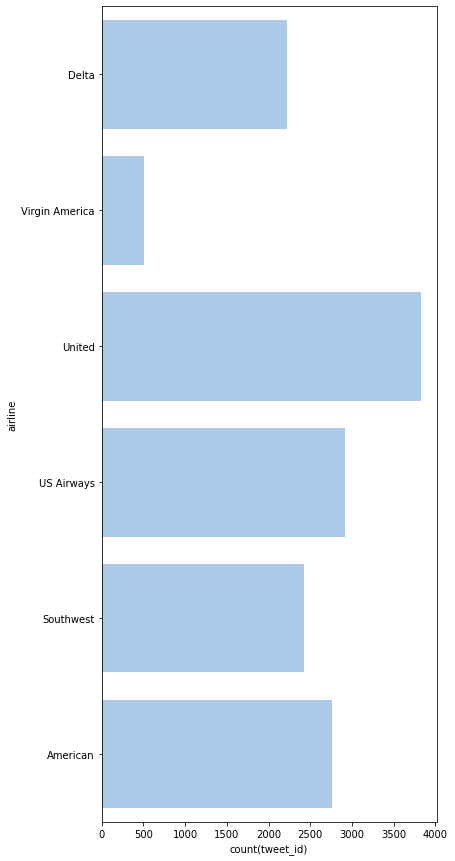

In [96]:
# Plotting 
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x=q5p['count(tweet_id)'], y=q5p['airline'], data=q5p,
            label="Total", color="b")

In [97]:
tweets = df.toPandas()

In [98]:
tweets_df=tweets.drop(tweets[tweets['airline_sentiment_confidence']<0.5].index,axis=0)
tweets_df.shape
X=tweets_df['text']
y=tweets_df['airline_sentiment']


In [99]:
!pip install nltk

In [100]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [101]:
stop_words=stopwords.words('english')
stemmer=PorterStemmer()

In [102]:
import re
cleaned_data=[]
for i in range(len(X)):
   tweet=re.sub('[^a-zA-Z]',' ',X.iloc[i])
   tweet=tweet.lower().split()
   tweet=[stemmer.stem(word) for word in tweet if (word not in stop_words)]
   tweet=' '.join(tweet)
   cleaned_data.append(tweet)

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000,stop_words=['virginamerica','unit'])
X_fin=cv.fit_transform(cleaned_data).toarray()

In [104]:
sentiment_ordering = ['negative', 'neutral', 'positive']
y = y.apply(lambda x: sentiment_ordering.index(x))

In [105]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_fin,y,test_size=0.3)
model.fit(X_train,y_train)

MultinomialNB()

In [107]:
y_pred=model.predict(X_test)
from sklearn.metrics import classification_report
cf=classification_report(y_test,y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2762
           1       0.57      0.52      0.54       863
           2       0.72      0.67      0.69       697

    accuracy                           0.77      4322
   macro avg       0.71      0.69      0.70      4322
weighted avg       0.76      0.77      0.77      4322

